This notebook is for fitting some models for the coronavirus dataset

In [8]:
import numpy as np 
import pandas as pd
import data_module_covid as dmc 
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

Read the data:

In [9]:

data_ = dmc.get_data_from_HS()
df = pd.DataFrame.from_dict(data_["confirmed"])
covid = dmc.extract_counts(df)
print(covid)

count  days_from_beginning  cum_sum
new_dates                                      
2020-01-29      1                    0        1
2020-02-26      1                   28        2
2020-02-28      1                   30        3
2020-03-01      3                   32        6
2020-03-02      1                   33        7
2020-03-05      5                   36       12
2020-03-06      3                   37       15
2020-03-07      4                   38       19
2020-03-08      5                   39       24
2020-03-09      9                   40       33
2020-03-10      7                   41       40
2020-03-11     25                   42       65
2020-03-12     46                   43      111
2020-03-13     46                   44      157
2020-03-14     70                   45      227
2020-03-15     17                   46      244


Fit an exponential function to the cumulative sum -data and visualise the results

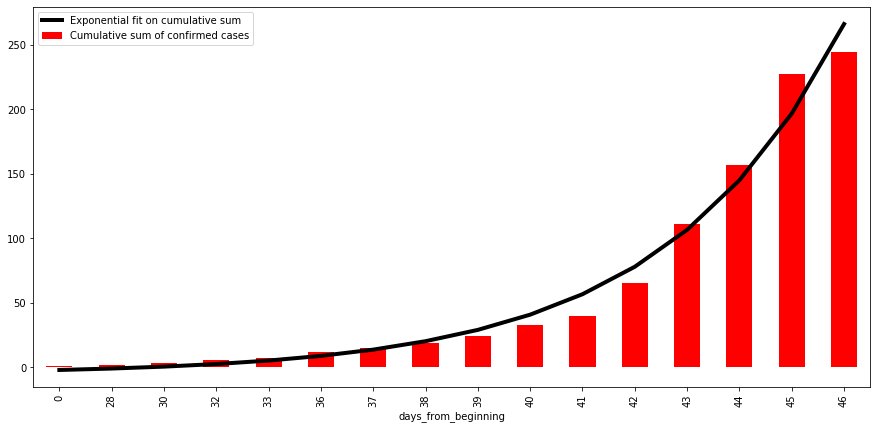

In [21]:
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

xdata = range(0,len(covid))
popt, pcov = curve_fit(exp_func, xdata, covid['cum_sum'])

fig,ax = plt.subplots(figsize=(15,7))
ax.plot(xdata, exp_func(xdata, *popt), 'black',linewidth=4,label="Exponential fit on cumulative sum")
covid.plot.bar(x='days_from_beginning',y = 'cum_sum',ax=ax,color = 'red',label="Cumulative sum of confirmed cases")
plt.legend()